In [41]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
data=pd.read_csv('train.csv')

In [43]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [45]:
f1=lambda x:0 if type(x)==float else 1

In [46]:
data['Cabin'].apply(f1)

0      0
1      1
2      0
3      1
4      0
5      0
6      1
7      0
8      0
9      0
10     1
11     1
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     1
22     0
23     1
24     0
25     0
26     0
27     1
28     0
29     0
      ..
861    0
862    1
863    0
864    0
865    0
866    0
867    1
868    0
869    0
870    0
871    1
872    1
873    0
874    0
875    0
876    0
877    0
878    0
879    1
880    0
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Cabin, Length: 891, dtype: int64

In [47]:
data['Has_cabin']=data['Cabin'].apply(f1)

In [48]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [49]:
data['FamilySize']=data['SibSp']+data['Parch']+1
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_cabin,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,2


In [50]:
data[(data['Embarked']!='S')&(data['Embarked']!='C')&(data['Embarked']!='Q')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_cabin,FamilySize
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1,1


In [51]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_cabin,FamilySize
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1,1


In [52]:
data[data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_cabin,FamilySize
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1,1


In [53]:
data['Embarked']=data['Embarked'].fillna('S')

In [54]:
data[data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_cabin,FamilySize
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,1
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0,1
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0,1
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0,1
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,0,1
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,0,1
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,1,2
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,0,1
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,0,1
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,0,1


In [55]:
age_avg=data['Age'].mean()
age_std=data['Age'].std()
age_null_count=data['Age'].isnull().sum()

In [56]:
age_null_count

177

In [57]:
age_avg

29.69911764705882

In [58]:
age_std

14.526497332334044

In [59]:
age_null_random_list=np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
age_null_random_list

array([39, 15, 19, 21, 19, 39, 26, 21, 40, 31, 42, 20, 27, 18, 42, 30, 22,
       25, 41, 30, 42, 35, 33, 29, 23, 35, 23, 26, 22, 36, 31, 15, 23, 25,
       18, 41, 23, 33, 27, 36, 34, 29, 31, 41, 27, 29, 30, 35, 39, 21, 20,
       15, 36, 37, 24, 25, 36, 23, 37, 35, 25, 39, 24, 22, 21, 30, 42, 23,
       16, 31, 18, 19, 35, 43, 34, 20, 32, 37, 30, 28, 18, 26, 36, 18, 27,
       43, 20, 43, 36, 15, 19, 28, 19, 36, 17, 27, 21, 37, 30, 40, 41, 39,
       36, 32, 16, 27, 30, 32, 21, 17, 23, 24, 40, 42, 30, 26, 23, 15, 26,
       32, 29, 30, 41, 26, 18, 17, 16, 34, 40, 40, 32, 20, 31, 29, 19, 35,
       25, 33, 42, 39, 19, 26, 31, 18, 20, 42, 16, 27, 33, 23, 40, 34, 22,
       17, 20, 30, 36, 38, 37, 17, 16, 28, 38, 26, 38, 18, 42, 20, 40, 41,
       22, 38, 30, 36, 41, 28, 37])

In [60]:
data.loc[np.isnan(data['Age']),'Age']=age_null_random_list
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_cabin,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
5,6,0,3,"Moran, Mr. James",male,39.0,0,0,330877,8.4583,NaN,Q,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,2


In [61]:
data['Age']=data['Age'].astype(int)

In [62]:
data['Sex']=data['Sex'].map({'female':1,'male':0}).astype(int)

In [63]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_cabin,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S,1,2
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S,0,1
5,6,0,3,"Moran, Mr. James",0,39,0,0,330877,8.4583,NaN,Q,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",0,54,0,0,17463,51.8625,E46,S,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2,3,1,349909,21.0750,NaN,S,0,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27,0,2,347742,11.1333,NaN,S,0,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14,1,0,237736,30.0708,NaN,C,0,2


# Working on title

In [64]:
# define function to extract titles from passenger names
def get_title(name):
    title_search = re.search('([A-Za-z]+\.)',name)
    # if the title exists, extract and return it.
    if title_search:
        return title_search[0]

In [65]:
re.search('([A-Za-z]+\.)','Cumings, Mrs. John Bradley')

<re.Match object; span=(9, 13), match='Mrs.'>

In [66]:
zz=re.search('([A-Za-z]+\.)','Cumings, Mrs. John Bradley')

In [67]:
zz[0]

'Mrs.'

In [68]:
data['Title']=data['Name'].apply(get_title)

In [69]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_cabin,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S,0,2,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C,1,2,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S,1,2,Mrs.
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S,0,1,Mr.


In [70]:
data['Title']=data['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
data['Title']=data['Title'].replace('Mlle','Miss')
data['Title']=data['Title'].replace('Ms','Miss')
data['Title']=data['Title'].replace('Mme','Mrs')

In [71]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_cabin,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S,0,2,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C,1,2,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S,1,2,Mrs.
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S,0,1,Mr.
5,6,0,3,"Moran, Mr. James",0,39,0,0,330877,8.4583,NaN,Q,0,1,Mr.
6,7,0,1,"McCarthy, Mr. Timothy J",0,54,0,0,17463,51.8625,E46,S,1,1,Mr.
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2,3,1,349909,21.0750,NaN,S,0,5,Master.
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27,0,2,347742,11.1333,NaN,S,0,3,Mrs.
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14,1,0,237736,30.0708,NaN,C,0,2,Mrs.


In [72]:
title_mapping={'Mr.': 1,'Master.' : 2,'Mrs.' : 3,'Miss.':4, 'Rare.':5}
data['Title']=data['Title'].map(title_mapping)
#data['Title']=data['Title'].fillna(0)

In [73]:
data['Embarked']=data['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

In [75]:
data['Title']=data['Title'].fillna(0)

In [76]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_cabin,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0,0,2,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1,1,2,3.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,4.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0,1,2,3.0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0,0,1,1.0
5,6,0,3,"Moran, Mr. James",0,39,0,0,330877,8.4583,NaN,2,0,1,1.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54,0,0,17463,51.8625,E46,0,1,1,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2,3,1,349909,21.0750,NaN,0,0,5,2.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27,0,2,347742,11.1333,NaN,0,0,3,3.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14,1,0,237736,30.0708,NaN,1,0,2,3.0


In [77]:
drop_elements=['PassengerId','Name','Ticket','Cabin','SibSp','Parch']
data=data.drop(drop_elements,axis=1)

In [79]:
data

,Survived,Pclass,Sex,Age,Fare,Embarked,Has_cabin,FamilySize,Title
0,0,3,0,22,7.2500,0,0,2,1.0
1,1,1,1,38,71.2833,1,1,2,3.0
2,1,3,1,26,7.9250,0,0,1,4.0
3,1,1,1,35,53.1000,0,1,2,3.0
4,0,3,0,35,8.0500,0,0,1,1.0
5,0,3,0,39,8.4583,2,0,1,1.0
6,0,1,0,54,51.8625,0,1,1,1.0
7,0,3,0,2,21.0750,0,0,5,2.0
8,1,3,1,27,11.1333,0,0,3,3.0
9,1,2,1,14,30.0708,1,0,2,3.0


In [80]:
# fare mappping
data.loc[data['Fare']<= 7.91 , 'Fare']=0

In [81]:
data.loc[(data['Fare']> 7.91) & (data['Fare']<= 14.454) , 'Fare']=1 

In [82]:
data.loc[(data['Fare']> 14.454) & (data['Fare']<=31) , 'Fare']=2


In [83]:
data.loc[data['Fare']> 31 ,'Fare']=3

In [84]:
data['Fare']=data['Fare'].astype(int)

In [86]:
data

,Survived,Pclass,Sex,Age,Fare,Embarked,Has_cabin,FamilySize,Title
0,0,3,0,22,0,0,0,2,1.0
1,1,1,1,38,3,1,1,2,3.0
2,1,3,1,26,1,0,0,1,4.0
3,1,1,1,35,3,0,1,2,3.0
4,0,3,0,35,1,0,0,1,1.0
5,0,3,0,39,1,2,0,1,1.0
6,0,1,0,54,3,0,1,1,1.0
7,0,3,0,2,2,0,0,5,2.0
8,1,3,1,27,1,0,0,3,3.0
9,1,2,1,14,2,1,0,2,3.0


In [87]:
a=data.corr()
a

,Survived,Pclass,Sex,Age,Fare,Embarked,Has_cabin,FamilySize,Title
Survived,1.000000,-0.338481,0.543351,-0.072562,0.295875,0.106811,0.316912,0.016639,0.502061
Pclass,-0.338481,1.000000,-0.131900,-0.309981,-0.628459,0.045702,-0.725541,0.065997,-0.040453
Sex,0.543351,-0.131900,1.000000,-0.093158,0.248940,0.116569,0.140391,0.200988,0.921516
Age,-0.072562,-0.309981,-0.093158,1.000000,0.051634,0.000211,0.217489,-0.249084,-0.229340
Fare,0.295875,-0.628459,0.248940,0.051634,1.000000,-0.091096,0.497108,0.465815,0.202803
Embarked,0.106811,0.045702,0.116569,0.000211,-0.091096,1.000000,0.013774,-0.080281,0.128760
Has_cabin,0.316912,-0.725541,0.140391,0.217489,0.497108,0.013774,1.000000,-0.009175,0.078545
FamilySize,0.016639,0.065997,0.200988,-0.249084,0.465815,-0.080281,-0.009175,1.000000,0.258524
Title,0.502061,-0.040453,0.921516,-0.229340,0.202803,0.128760,0.078545,0.258524,1.000000


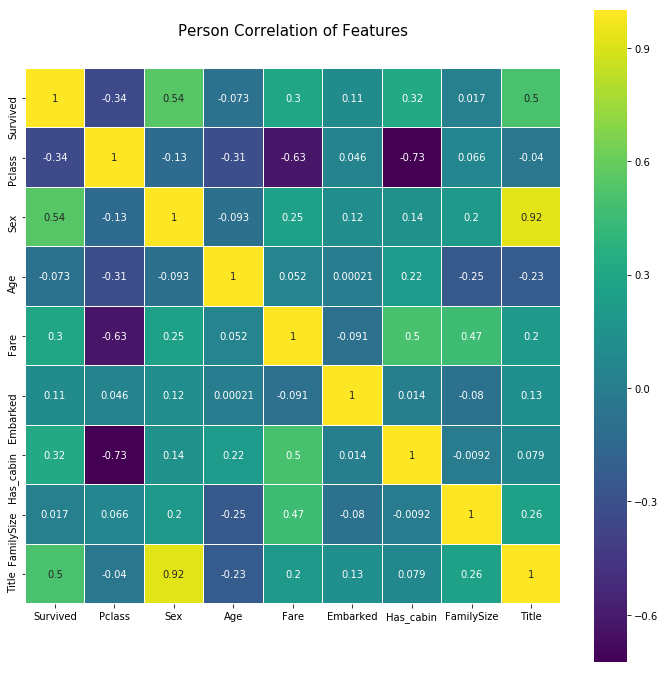

In [88]:
colormap=plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Person Correlation of Features',y=1.05, size=15)
sns.heatmap(a,linewidths=0.1,vmax=1.0,square=True,cmap=colormap,linecolor='white',annot=True)

https://elitedatascience.com/python-seaborn-tutorial